<a href="https://colab.research.google.com/github/liadmagen/Modeling_course/blob/main/exercises_notebooks_solutions/04_Probabelistic_Modeling_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabelistic Modeling

## Review - Maximum Likelihood Estimation
We would like to create a model that can solve some classification problem.

If we knew the true distribution of the data, we could have easily solved it. Since we don't, we can try this method:

- Assume the data is drawn from some combination of a family of parametric distributions, such as Gausian, Binomial, Bernouilli, etc.
- We try to predict the parameters by calculating the derivient or by taking a `log` of a sequence probabilities and optimizing it as a min-max problem.

### Why does this matter? 
In supervised Machine learning you are provided with training data $D$. You use this data to train a model, represented by its parameters $θ$. With this model you want to make predictions on a test point $x_t$.

In **MLE Prediction** the problem is defined as $P(y|x_t;θ)$ And we are interested in learning 
$$θ=argmaxθP(D;θ)$$ 
Where $θ$ is purely a model parameter. We do that by maximizing $log[P(D;θ)] $

## Naïve Bayes Models

### Background

Naive Bayes is one of the two main probability theories (the second one is the frequentist theory). As opposed to frequentist theory, here, in addition to counting previously observed frequencies, one can incorporate initial believes.

> For example:
  We measure some *Heads* and *Tails* in a coin flip. The mean is close to 0.5, so we assume that the coin is fair. 
  How can we model that? 
  In frequentist statistics, we can add some imaginary number of throws - $m$:
  $$ Θ = \frac{nHeads + m}{nHead + nTails + 2m} $$
  
Or, we go the Bayes way.

In Bayesian statistics, $Θ$ is defined as a **random variable**, which is not associated with *any* event. n frequentist statistics, this is forbidden. In Bayesian statistics, this is allowed and you can specify a prior belief $P(θ)$ defining what values you believe $θ$ is likely to take on.

The Bayes rule states that:
$$P(θ∣D)= \frac{P(D∣θ) P(θ)}{P(D)}$$
Where:

* $P(θ)$ is the prior distribution over the parameter(s) $θ$, before we see any data.
* $P(D∣θ)$ is the likelihood of the data given the parameter(s) $θ$.
* $P(θ∣D)$ is the posterior distribution over the parameter(s) $θ$ after we have observed the data.

To understand the Bayes deeper, check out the following video:

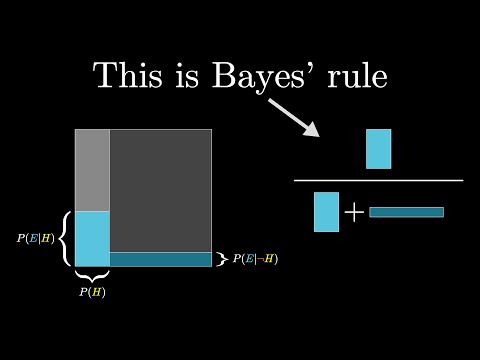

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('HZGCoVF3YvM')

# Exercise

Let's try it out

In [15]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn 

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.pipeline import Pipeline

%matplotlib inline 

In [3]:
df_emails = pd.read_csv('https://raw.githubusercontent.com/liadmagen/Modeling_course/main/data/spam_or_not_spam.csv', encoding="UTF-8")
df_emails.tail()

,email,label
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1
2999,hello this is chinese traditional 子 件 NUMBER世...,1


Let's divide the data into training and test sets

In [4]:
############## YOUR TURN ##############
# Divide the data into training and test set:
# X_train, X_test, y_train, y_test

# use the colunm 'email' for the training data
# use the column 'label' as the target y

X = df_emails['email']
y = df_emails['label']
X_train, X_test, y_train, y_test = train_test_split(X, y)





########################################

We are going to use some NLP methods here.

If it is too much - don't worry, you will learn them all deeply in the NLP week.

We process the text a bit - transforming every word to some fraction, based on their frequency. This score represents how unique the word is, based on their appearance count in the whole dataset.

We will use a [Naive Bayes, assuming a Multinomial distribution](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

In [25]:
# Create Pre-processing pipeline and a Multinomial Naive Bayes classifier.

# CountVectorizer calculates the frequency of words in the dataset (how often they appear) 
# TfidfTransformer calculates the frequency of a word in this document, divided by their frequency over ALL the documents.  

# MultinomialNB is a Naive Bayes classifier assuming a multinomial distribution 
spam_classifier = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB()), ])

And we train:

In [26]:
spam_classifier.fit(X_train.values.astype('U'), y_train) 

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

Now that we have a classifier - let's filter some spam!!!

In [27]:
y_preds = spam_classifier.predict(X_test.values.astype('U'))


How well did we do?

In [28]:
print(metrics.classification_report(y_test, y_preds, target_names=["Spam","Not Spam"]))

              precision    recall  f1-score   support

        Spam       0.85      1.00      0.92       623
    Not Spam       1.00      0.16      0.27       127

    accuracy                           0.86       750
   macro avg       0.93      0.58      0.60       750
weighted avg       0.88      0.86      0.81       750



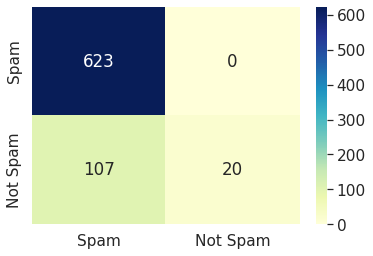

In [29]:
conf_mat = metrics.confusion_matrix(y_test, y_preds) 
df_cm = pd.DataFrame(conf_mat, ["Spam","Not Spam"], ["Spam","Not Spam"]) 

sn.set(font_scale=1.4) 
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")


# Can we do better?

Let's try it again - this time with another inductive bias - we will assume the distribution of the text is of [`ComplementNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB)

---
## Your turn:

Create a pipeline with a [Complement Naive Bayes classifier](https://scikit-learn.org/stable/modules/naive_bayes.html#complement-naive-bayes), which fits better imbalanced classes, and train it on our dataset.

Check your results on the test-set and plot a confussion matrix. 

How did your new model do?

              precision    recall  f1-score   support

        Spam       0.90      1.00      0.94       623
    Not Spam       1.00      0.43      0.60       127

    accuracy                           0.90       750
   macro avg       0.95      0.71      0.77       750
weighted avg       0.91      0.90      0.89       750



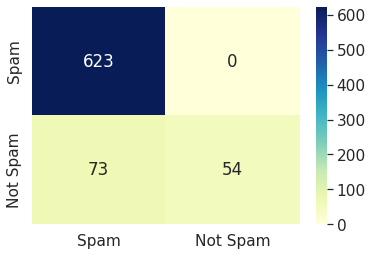

In [24]:
### Your turn ###

 


spam_classifier = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', ComplementNB()), ])
spam_classifier.fit(X_train.values.astype('U'), y_train) 
y_preds = spam_classifier.predict(X_test.values.astype('U'))

print(metrics.classification_report(y_test, y_preds, target_names=["Spam","Not Spam"]))
conf_mat = metrics.confusion_matrix(y_test, y_preds) 
df_cm = pd.DataFrame(conf_mat, ["Spam","Not Spam"], ["Spam","Not Spam"]) 

sn.set(font_scale=1.4) 
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")




##################

# Diving deeper

If you wish to diver deeper into the topic and see mor examples, consider [reading this article](http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote05.html)